 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_portfolio=pd.read_csv('whale_returns.csv',index_col='Date',keep_default_na=False,parse_dates=['Date'],infer_datetime_format=True)
whale_portfolio['SOROS LLC']=  pd.to_numeric(whale_portfolio['SOROS LLC'],errors='coerce')
whale_portfolio.head()

SOROS LLC            PAULSON INC               TIGER LLC  \
Date                                                                   
2015-03-02        NaN                                                  
2015-03-03  -0.001266  -0.004980519330323507  -0.0004955323147710633   
2015-03-04   0.002230   0.003241280460949403   -0.002533976773233637   
2015-03-05   0.004016   0.004076052738837932    0.002354656751653028   
2015-03-06  -0.007905  -0.003574033706685631   -0.008481173398287467   

               BERKSHIRE HATHAWAY  
Date                               
2015-03-02                         
2015-03-03  -0.006568669777734182  
2015-03-04   0.004213019161491749  
2015-03-05   0.006726329822673627  
2015-03-06  -0.013098061052771559

In [3]:
whale_portfolio['PAULSON INC']=  pd.to_numeric(whale_portfolio['PAULSON INC'],errors='coerce')

In [4]:
whale_portfolio['TIGER LLC']=  pd.to_numeric(whale_portfolio['TIGER LLC'],errors='coerce')

In [5]:
whale_portfolio['BERKSHIRE HATHAWAY']=  pd.to_numeric(whale_portfolio['BERKSHIRE HATHAWAY'],errors='coerce')

In [6]:
# Drop nulls
whale_portfolio.dropna(inplace=True)
whale_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SOROS LLC           1059 non-null   float64
 1   PAULSON INC         1059 non-null   float64
 2   TIGER LLC           1059 non-null   float64
 3   BERKSHIRE HATHAWAY  1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_portfolio=pd.read_csv('algo_returns.csv',index_col='Date',keep_default_na=False,parse_dates=True,infer_datetime_format=True)
algo_portfolio['Algo 2']=  pd.to_numeric(algo_portfolio['Algo 2'],errors='coerce')

In [8]:
# Count nulls
algo_portfolio.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_portfolio.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_close=pd.read_csv('sp500_history.csv',index_col='Date',keep_default_na=False,parse_dates=True,infer_datetime_format=True)
sp500_close.head()

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [11]:
# Check Data Types
sp500_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [12]:
# Fix Data Types
sp500_close.replace(to_replace='\$',value="",regex=True,inplace=True)
sp500_close['Close'] = pd.to_numeric(sp500_close['Close'])
sp500_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [13]:
# Calculate Daily Returns
sp500pct=sp500_close.pct_change()

In [14]:
# Drop nulls
sp500pct.isnull().sum()
sp500pct.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500pct.columns=['SP500']
sp500pct.head()

SP500
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combinedreturns=pd.concat([whale_portfolio,algo_portfolio,sp500pct],axis=1,join='inner')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [17]:
combinedreturns

SOROS LLC  PAULSON INC  TIGER LLC  BERKSHIRE HATHAWAY    Algo 1  \
Date                                                                          
2015-03-03  -0.001266    -0.004981  -0.000496           -0.006569 -0.001942   
2015-03-04   0.002230     0.003241  -0.002534            0.004213 -0.008589   
2015-03-05   0.004016     0.004076   0.002355            0.006726 -0.000955   
2015-03-06  -0.007905    -0.003574  -0.008481           -0.013098 -0.004957   
2015-03-09   0.000582     0.004225   0.005843           -0.001652 -0.005447   
...               ...          ...        ...                 ...       ...   
2019-04-15  -0.001422    -0.001156   0.000398           -0.010492 -0.004331   
2019-04-16   0.002699     0.000388  -0.000831            0.000837 -0.006945   
2019-04-17  -0.002897    -0.006467  -0.004409            0.003222 -0.010301   
2019-04-18   0.001448     0.001222   0.000582            0.001916 -0.000588   
2019-04-22  -0.002586    -0.007333  -0.003640           -0.001088  0.000677   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254  
...              ...       ...  
2019-04-15 -0.004572 -0.000509  
2019-04-16  0.002899  0.002279  
2019-04-17 -0.005228 -0.001577  
2019-04-18 -0.001229 -0.001011  
2019-04-22 -0.001936 -0.008764  

[1042 rows x 7 columns]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

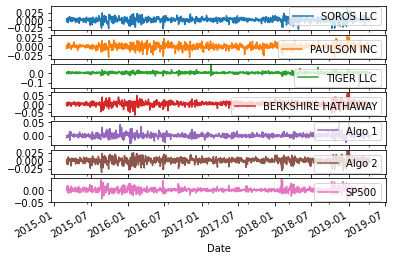

In [18]:
# Plot daily returns of all portfolios
combinedreturns.plot(subplots=True)



#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

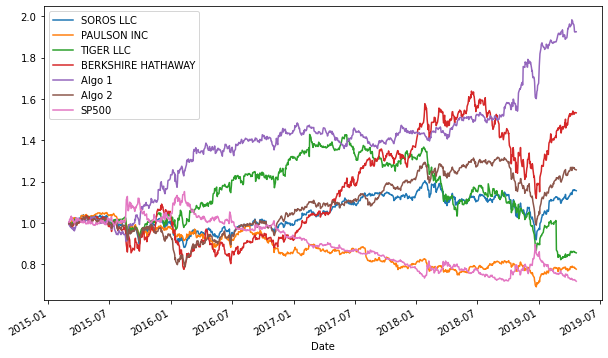

In [19]:
# Calculate cumulative returns of all portfolios
cumulativereturns = (1 + combinedreturns).cumprod()
# Plot cumulative returns
cumulativereturns.plot(figsize=(10,6))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

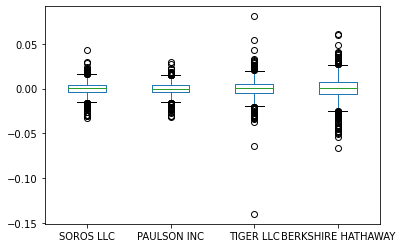

In [20]:
# Box plot to visually show risk
whale_portfolio.plot(kind="box")

<AxesSubplot:>

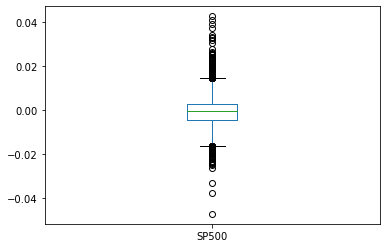

In [21]:
sp500pct.plot(kind='box')

<AxesSubplot:>

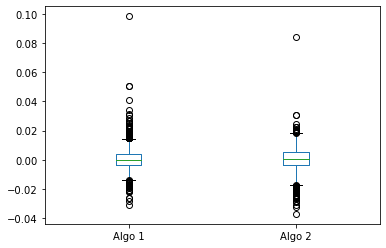

In [22]:
algo_portfolio.plot(kind='box')

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
combinedreturns.std().sort_values(ascending=False)

BERKSHIRE HATHAWAY    0.012919
TIGER LLC             0.010897
SP500                 0.008587
Algo 2                0.008341
SOROS LLC             0.007896
Algo 1                0.007623
PAULSON INC           0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500
combinedreturns['SP500'].std()

0.00858688974707399

##### Determine which portfolios are riskier than the S&P 500
* With the Sp500 standard deviation being .008135. The portfolios that are riskier are Tiger LLC(.010824), Berkshire Hathoway(.012831), and the Algo 2(.008466) trading bot.

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualizedstd = combinedreturns.std() * np.sqrt(252)
annualizedstd

SOROS LLC             0.125348
PAULSON INC           0.111527
TIGER LLC             0.172989
BERKSHIRE HATHAWAY    0.205079
Algo 1                0.121006
Algo 2                0.132413
SP500                 0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

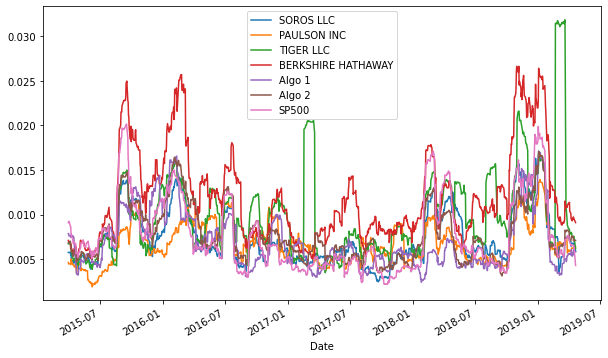

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingstd=combinedreturns.rolling(window=21).std().dropna()
# Plot the rolling standard deviation
rollingstd.plot(figsize=(10,6))

### Calculate and plot the correlation

<AxesSubplot:>

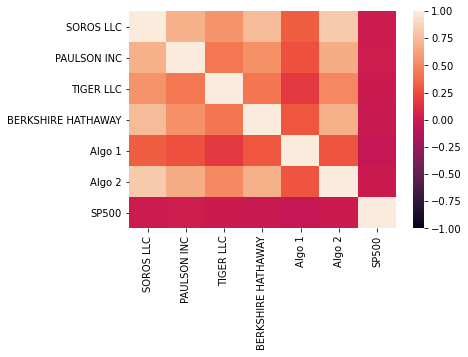

In [27]:
# Calculate the correlation
combinedcorr=combinedreturns.corr()
# Display de correlation matrix
sns.heatmap(combinedcorr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

The covariance of Berkshire Hathaway is -1.5371091324717376e-06
The varaince of the SP 500 is 7.373467552840441e-05
the beta of Berkshire Hathaway vs the SP500 is -0.0208464894089024


<AxesSubplot:xlabel='Date'>

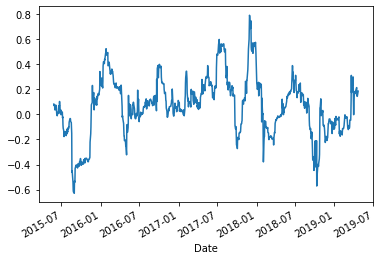

In [28]:
# Calculate covariance of a single portfolio
covariance = combinedreturns['BERKSHIRE HATHAWAY'].cov(combinedreturns['SP500'])
print(f'The covariance of Berkshire Hathaway is {covariance}')
# Calculate variance of S&P 500
variance = combinedreturns['SP500'].var()
print(f'The varaince of the SP 500 is {variance}')
# Computing beta
bkbeta = covariance / variance
print(f'the beta of Berkshire Hathaway vs the SP500 is {bkbeta}')
# Plot beta trend
rolling_c = combinedreturns['BERKSHIRE HATHAWAY'].rolling(window=60).cov(combinedreturns['SP500'])
rolling_v = combinedreturns['SP500'].rolling(window=60).var()
rolling_b=rolling_c / rolling_v
rolling_b.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [53]:
# Use `ewm` to calculate the rolling window
combinedreturns.ewm(halflife='21 days',times=pd.DatetimeIndex(combinedreturns.index)).mean()

SOROS LLC  PAULSON INC  TIGER LLC  BERKSHIRE HATHAWAY    Algo 1  \
Date                                                                          
2015-03-03  -0.001266    -0.004981  -0.000496           -0.006569 -0.001942   
2015-03-04   0.000511    -0.000802  -0.001532           -0.001089 -0.005320   
2015-03-05   0.001718     0.000878  -0.000193            0.001603 -0.003817   
2015-03-06  -0.000808    -0.000291  -0.002369           -0.002256 -0.004116   
2015-03-09  -0.000496     0.000724  -0.000524           -0.002121 -0.004415   
...               ...          ...        ...                 ...       ...   
2019-04-15   0.001598     0.000493  -0.000351            0.001873  0.001059   
2019-04-16   0.001649     0.000489  -0.000374            0.001825  0.000688   
2019-04-17   0.001441     0.000171  -0.000558            0.001889  0.000186   
2019-04-18   0.001441     0.000218  -0.000507            0.001890  0.000151   
2019-04-22   0.001244    -0.000152  -0.000660            0.001744  0.000177   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.000761  0.001560  
2015-03-05  0.001988  0.005975  
2015-03-06 -0.001542  0.003375  
2015-03-09 -0.000903  0.006494  
...              ...       ...  
2019-04-15  0.001365 -0.001432  
2019-04-16  0.001437 -0.001260  
2019-04-17  0.001132 -0.001275  
2019-04-18  0.001025 -0.001263  
2019-04-22  0.000880 -0.001630  

[1042 rows x 7 columns]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
# risk free rate not available so calculation may be wrong
sharpe_ratio = (combinedreturns.mean() * 252) / (combinedreturns.std() * np.sqrt(252))

<AxesSubplot:>

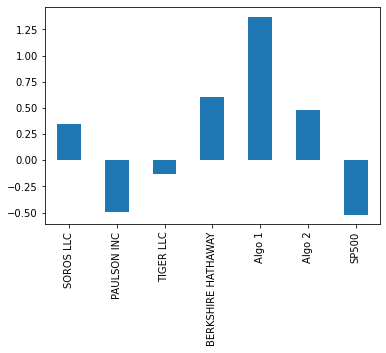

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [32]:
# Reading data from 1st stock
import yfinance as yf
customdata = yf.download("COST GOOG AAPL", start="2018-04-22", end="2019-04-22")

[*********************100%***********************]  3 of 3 completed


In [33]:
customdata.head()

Adj Close                               Close              \
                 AAPL        COST         GOOG       AAPL        COST   
Date                                                                    
2018-04-23  39.788155  182.826401  1067.449951  41.310001  193.350006   
2018-04-24  39.234344  182.032074  1019.979980  40.735001  192.509995   
2018-04-25  39.405293  183.412643  1021.179993  40.912498  193.970001   
2018-04-26  39.542557  184.632431  1040.040039  41.055000  195.259995   
2018-04-27  39.085056  185.880569  1030.050049  40.580002  196.580002   

                              High                                 Low  \
                   GOOG       AAPL        COST         GOOG       AAPL   
Date                                                                     
2018-04-23  1067.449951  41.730000  194.380005  1082.719971  41.022499   
2018-04-24  1019.979980  41.582500  195.360001  1057.000000  40.305000   
2018-04-25  1021.179993  41.355000  194.669998  1032.489990  40.602501   
2018-04-26  1040.040039  41.432499  196.440002  1047.979980  40.842499   
2018-04-27  1030.050049  41.082500  196.919998  1049.500000  40.157501   

                                          Open                           \
                  COST         GOOG       AAPL        COST         GOOG   
Date                                                                      
2018-04-23  192.259995  1060.699951  41.707500  193.809998  1077.859985   
2018-04-24  191.149994  1010.590027  41.417500  194.539993  1052.000000   
2018-04-25  191.389999  1015.309998  40.654999  192.229996  1025.520020   
2018-04-26  193.339996  1018.190002  41.029999  194.119995  1029.510010   
2018-04-27  194.529999  1025.589966  41.000000  194.949997  1046.000000   

               Volume                    
                 AAPL     COST     GOOG  
Date                                     
2018-04-23  146062000  1618000  2341300  
2018-04-24  134768000  1598900  4760300  
2018-04-25  113528400  1311700  2391100  
2018-04-26  111852000  1445800  2079500  
2018-04-27  142623200  1563100  1619800

In [34]:
# Reading data from 2nd stock


In [35]:
# Reading data from 3rd stock
customdata.dropna(inplace=True)

In [36]:
# Combine all stocks in a single DataFrame
# Reorganize portfolio data by having a column per symbol
del customdata['High']

In [37]:
del customdata['Low']

In [38]:
del customdata['Volume']

In [39]:
del customdata['Open']

In [40]:
del customdata['Adj Close']

In [41]:
customdata.head()

Close                         
                 AAPL        COST         GOOG
Date                                          
2018-04-23  41.310001  193.350006  1067.449951
2018-04-24  40.735001  192.509995  1019.979980
2018-04-25  40.912498  193.970001  1021.179993
2018-04-26  41.055000  195.259995  1040.040039
2018-04-27  40.580002  196.580002  1030.050049

In [42]:
customdf=pd.DataFrame()

In [43]:
customdf["APPL"]=customdata['Close']['AAPL']
customdf["COST"]=customdata['Close']['COST']
customdf["GOOG"]=customdata['Close']['GOOG']
customdf

APPL        COST         GOOG
Date                                          
2018-04-23  41.310001  193.350006  1067.449951
2018-04-24  40.735001  192.509995  1019.979980
2018-04-25  40.912498  193.970001  1021.179993
2018-04-26  41.055000  195.259995  1040.040039
2018-04-27  40.580002  196.580002  1030.050049
...               ...         ...          ...
2019-04-12  49.717499  241.949997  1217.869995
2019-04-15  49.807499  246.330002  1221.099976
2019-04-16  49.812500  245.339996  1227.130005
2019-04-17  50.782501  245.559998  1236.339966
2019-04-18  50.965000  245.809998  1236.369995

[250 rows x 3 columns]

In [44]:
# Reset Date index
# i dont know why I would do this

In [45]:
# Drop NAs
customdf.isnull().sum()

APPL    0
COST    0
GOOG    0
dtype: int64

In [46]:
# Calculate daily returns
customdfpct=customdf.pct_change().dropna()

In [47]:
# Display sample data
customdfpct.head()

APPL      COST      GOOG
Date                                    
2018-04-24 -0.013919 -0.004345 -0.044470
2018-04-25  0.004357  0.007584  0.001177
2018-04-26  0.003483  0.006650  0.018469
2018-04-27 -0.011570  0.006760 -0.009605
2018-04-30  0.018112  0.002950 -0.012349

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
weightedreturns=customdfpct*weights
# Display sample data
weightedreturns

APPL      COST      GOOG
Date                                    
2018-04-24 -0.004640 -0.001448 -0.014823
2018-04-25  0.001452  0.002528  0.000392
2018-04-26  0.001161  0.002217  0.006156
2018-04-27 -0.003857  0.002253 -0.003202
2018-04-30  0.006037  0.000983 -0.004116
...              ...       ...       ...
2019-04-12 -0.000134  0.000981  0.003666
2019-04-15  0.000603  0.006034  0.000884
2019-04-16  0.000033 -0.001340  0.001646
2019-04-17  0.006491  0.000299  0.002502
2019-04-18  0.001198  0.000339  0.000008

[249 rows x 3 columns]

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Join your returns DataFrame to the original returns DataFrame
customcombined=pd.concat([combinedreturns,weightedreturns],axis=1,join='inner')
customcombined

SOROS LLC  PAULSON INC  TIGER LLC  BERKSHIRE HATHAWAY    Algo 1  \
Date                                                                          
2018-04-24  -0.010467    -0.002791  -0.015645           -0.011289  0.004873   
2018-04-25  -0.000199    -0.002036   0.003021           -0.009720 -0.000113   
2018-04-26   0.007127     0.004416   0.005724            0.018664 -0.003238   
2018-04-27  -0.032711     0.000142   0.001663           -0.005245 -0.002001   
2018-04-30   0.004538    -0.011806  -0.015002           -0.001435 -0.002609   
...               ...          ...        ...                 ...       ...   
2019-04-12   0.005663    -0.001165   0.004217            0.007316 -0.005501   
2019-04-15  -0.001422    -0.001156   0.000398           -0.010492 -0.004331   
2019-04-16   0.002699     0.000388  -0.000831            0.000837 -0.006945   
2019-04-17  -0.002897    -0.006467  -0.004409            0.003222 -0.010301   
2019-04-18   0.001448     0.001222   0.000582            0.001916 -0.000588   

              Algo 2     SP500      APPL      COST      GOOG  
Date                                                          
2018-04-24 -0.006742 -0.001834 -0.004640 -0.001448 -0.014823  
2018-04-25 -0.001679 -0.010326  0.001452  0.002528  0.000392  
2018-04-26  0.005543 -0.001112  0.001161  0.002217  0.006156  
2018-04-27 -0.000782  0.008255 -0.003857  0.002253 -0.003202  
2018-04-30 -0.008726 -0.002543  0.006037  0.000983 -0.004116  
...              ...       ...       ...       ...       ...  
2019-04-12  0.004504  0.000630 -0.000134  0.000981  0.003666  
2019-04-15 -0.004572 -0.000509  0.000603  0.006034  0.000884  
2019-04-16  0.002899  0.002279  0.000033 -0.001340  0.001646  
2019-04-17 -0.005228 -0.001577  0.006491  0.000299  0.002502  
2019-04-18 -0.001229 -0.001011  0.001198  0.000339  0.000008  

[249 rows x 10 columns]

In [62]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
customcombined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2018-04-24 to 2019-04-18
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SOROS LLC           249 non-null    float64
 1   PAULSON INC         249 non-null    float64
 2   TIGER LLC           249 non-null    float64
 3   BERKSHIRE HATHAWAY  249 non-null    float64
 4   Algo 1              249 non-null    float64
 5   Algo 2              249 non-null    float64
 6   SP500               249 non-null    float64
 7   APPL                249 non-null    float64
 8   COST                249 non-null    float64
 9   GOOG                249 non-null    float64
dtypes: float64(10)
memory usage: 21.4 KB


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [59]:
# Calculate the annualized `std`
customannual = customcombined.std() * np.sqrt(252)
customannual

SOROS LLC             0.149128
PAULSON INC           0.116904
TIGER LLC             0.233533
BERKSHIRE HATHAWAY    0.242462
Algo 1                0.131198
Algo 2                0.136967
SP500                 0.150139
APPL                  0.099274
COST                  0.069410
GOOG                  0.086012
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

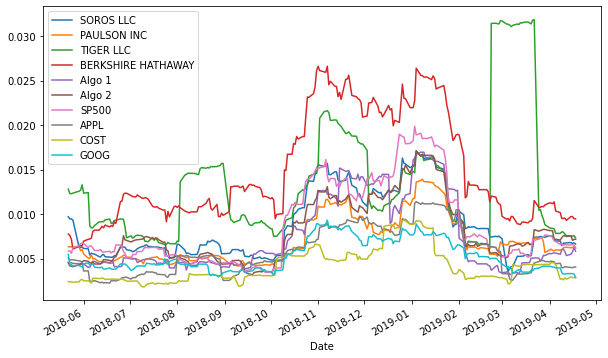

In [71]:
# Calculate rolling standard deviation
customrollingstd=customcombined.rolling(window=21).std().dropna()
# Plot the rolling standard deviation
# Plot rolling standard deviation
customrollingstd.plot(figsize=(10,6))

### Calculate and plot the correlation

<AxesSubplot:>

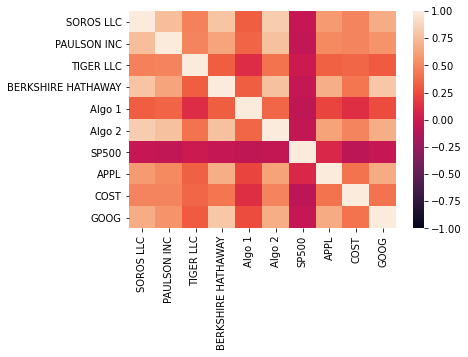

In [72]:
# Calculate and plot the correlation
# Calculate the correlation
customcorr=customcombined.corr()
# Display de correlation matrix
sns.heatmap(customcorr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

# Calculate and plot Beta
I have tried to do this and I have no idea how to combine the columns of the porfolio to compare to the sp500. I appoligize but I just have no idea how to do this

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [91]:
# Calculate Annualzied Sharpe Ratios
custsharpe_ratio = (weightedreturns.mean() * 252) / (weightedreturns.std() * np.sqrt(252))

vs


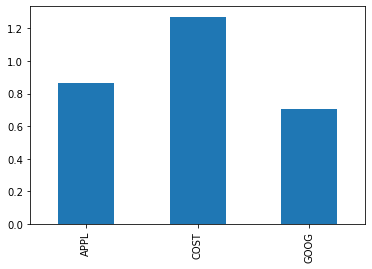

In [94]:
# Visualize the sharpe ratios as a bar plot
custsharpe_ratio.plot(kind='bar')


<AxesSubplot:>

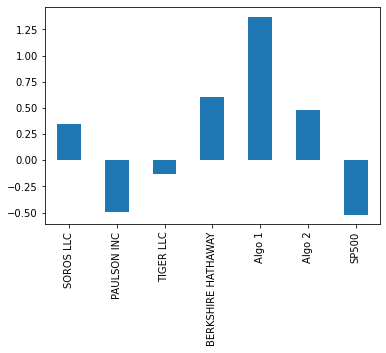

In [95]:
sharpe_ratio.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

At this point I have struggled with combining the porfolio with appl goog and cost into on average to compare and I have no idea how to do it. I tried for an extremely long time and unfortunately I have no idea how to do this. I have gone through all of my notes and I cant find a way to do so. I again apoligize but I just do not know how to combine the data even after searching for days.